# KNN on iris dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df=pd.read_csv("iris.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.size

750

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# categorical values to numerical values

In [10]:
from sklearn.preprocessing import LabelEncoder
LevelEncode=LabelEncoder()
df.species=LevelEncode.fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# splitting the predict column from the actual dataset 

In [11]:
x=df.drop("species",axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y=df["species"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

# splitting into train and test data

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [14]:
x_train.shape

(120, 4)

In [15]:
x_test.shape

(30, 4)

# training of the model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [17]:
test_accuracy=[]
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve,auc
for k in range(1,30,3):
    print("K=",k)
    neigh=KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    print("train confusion matrix:")
    print(confusion_matrix(y_train,neigh.predict(x_train)))
    print("test confusion matrix:")
    print(confusion_matrix(y_test,neigh.predict(x_test)))
    print(accuracy_score(y_test,neigh.predict(x_test)))
    print("*"*50)
    test_accuracy.append(accuracy_score(y_test,neigh.predict(x_test)))

K= 1
train confusion matrix:
[[40  0  0]
 [ 0 37  0]
 [ 0  0 43]]
test confusion matrix:
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
0.9666666666666667
**************************************************
K= 4
train confusion matrix:
[[40  0  0]
 [ 0 35  2]
 [ 0  2 41]]
test confusion matrix:
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
0.9666666666666667
**************************************************
K= 7
train confusion matrix:
[[40  0  0]
 [ 0 35  2]
 [ 0  1 42]]
test confusion matrix:
[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
0.9666666666666667
**************************************************
K= 10
train confusion matrix:
[[40  0  0]
 [ 0 36  1]
 [ 0  3 40]]
test confusion matrix:
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
1.0
**************************************************
K= 13
train confusion matrix:
[[40  0  0]
 [ 0 36  1]
 [ 0  1 42]]
test confusion matrix:
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
1.0
**************************************************
K= 16
train confusion matrix:
[[40  0  0]
 [ 0 3

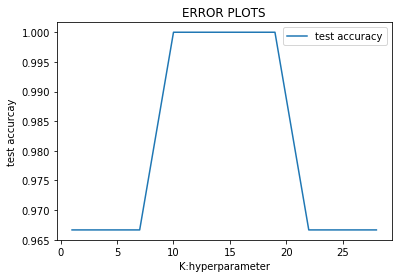

In [18]:
k=np.arange(1,30,3)
plt.plot(k,test_accuracy,label='test accuracy')

plt.legend()
plt.xlabel("K:hyperparameter")
plt.ylabel("test accurcay")
plt.title("ERROR PLOTS")
plt.show()

In [19]:
y_test.value_counts()

1    13
0    10
2     7
Name: species, dtype: int64

In [20]:
neigh=KNeighborsClassifier(n_neighbors=15)
neigh.fit(x_train,y_train)
print("test confusion matrix")
print(confusion_matrix(y_test,neigh.predict(x_test)))

test confusion matrix
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [21]:
pred=neigh.predict(x_test)
accuracy_score(y_test,pred)

1.0